# PHYS 105A:  Introduction to Scientific Computing

## Random Numbers and Monte Carlo Methods

* In physical science, students very often start with the concept that everything can be done exactly and deterministically.

* This can be one of the biggest misconcept!

* Many physical processes are non-deterministic by nature.  Examples include:
  * Radioactive decay
  * Quantum mechanics

* Sometime, even when the governing equations are in-principle deterministic, the results are still non-deterministic.  Examples include:
  * 3-body problem: https://www.youtube.com/watch?v=D2YhKaANbWE&ab_channel=PhysicsSimulations
  * Brownian motion
  * Fluid instability: https://youtu.be/Bqg31OwAqEQ
  * Turbulence: https://youtu.be/Q2HFwsThk0U
 
* There is a need to model these non-deterministic systems.
  * Probability theory
  * Stochastic (random) process 
  * Very interesting Veritasium vidoe: https://youtu.be/A5w-dEgIU1M

* In computation physics, we use Monte Carlo methods.

From Wikipedia:

Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three problem classes: 
* optimization
* numerical integration
* generating draws from a probability distribution

Question:

* how do you find out magnetic field lines?
* how do you know your structure-finding algorithm is robust (for example, you make your own program to find all bubbles in an image of the Galaxy)?
* what is the simplest way to input constant energy to a turbulent system?  https://youtu.be/4ORDgzIwK00

## Implement a Pseudo Random Number Generator

One may imaging performing Monte Carlo "simulation" by tossing coins.
But this approach has at least two fundamental problems:

* It will take forever.
* Coin toss is not [completely fair](https://www.scientificamerican.com/article/scientists-destroy-illusion-that-coin-toss-flips-are-50-50/).

Thankful mathematicians and computer scientist helped us do better.
Introducing pseudo random number generator.

* A typical pseudo random number generator has an internal state that is called the seed.
* This seed is then processed by a function to jump to another state.
* Pseudo random number generator is designed in a way that the outcome of the function is very sensitive to its input.
* A small difference of the seed will result a complete different result.

In [1]:
# In order to understand the concept of a random number generator, let's implement one ourself.

mynext = 1

def myrand(): # NOT RECOMMENDED for real application.
    global mynext # by default, python does not recognize variable in a different scope.
    mynext = mynext * 1103515245 + 12345 # the "linear congruential generator"
    return int(mynext//65536) % 32768 # translate from C

# This random number generator would generate integers in the domain [0, 32768).
# This information is usually provided to user by

MYRAND_MAX = 32768-1

# There are reasons for choosing the strange constants.  Take a look at
#     https://en.wikipedia.org/wiki/Linear_congruential_generator
# if you are interested.

In [2]:
# Now, every time we run `rand()`, we will get a different number

myrand()

16838

In [3]:
# We may just print many of them at the same time:

Rs = [myrand() for i in range(100)]
print(Rs)

[5758, 10113, 17515, 31051, 5627, 23010, 7419, 16212, 4086, 2749, 12767, 9084, 12060, 32225, 17543, 25089, 21183, 25137, 25566, 26966, 4978, 20495, 10311, 11367, 30054, 17031, 13145, 19882, 25736, 30524, 28505, 28394, 22102, 24851, 19067, 12754, 11653, 6561, 27096, 13628, 15188, 32085, 4143, 6967, 31406, 24165, 13403, 25562, 24834, 31353, 920, 10444, 24803, 7962, 19318, 1422, 31327, 10457, 1945, 14479, 29983, 18751, 3894, 18670, 8259, 16248, 7757, 15629, 13306, 28606, 13990, 11738, 12516, 1414, 5262, 17116, 22825, 3181, 13134, 25343, 8022, 11233, 7536, 9760, 9979, 29071, 1201, 21336, 13061, 22160, 24005, 30729, 7644, 27475, 31693, 25514, 14139, 22088, 26521, 5202]


In [4]:
# Sometime it is useful to make sure your random number sequence remains the same.
# In our case, you may notice that we can simply reset the `mynext` global variable to reset the sequence.
# The value you put in `mynext` is often called the "seed".

print('The following two lists are not the same:')
print([myrand() for i in range(10)])
print([myrand() for i in range(10)])

print('We may ensure that they are the same by "seeding" the random number generator with a fixed value:')

mynext = 1234
print([myrand() for i in range(10)])

mynext = 1234
print([myrand() for i in range(10)])

The following two lists are not the same:
[9171, 4434, 28317, 24582, 6815, 4586, 9653, 26306, 7174, 18451]
[23448, 6473, 32434, 8193, 14110, 24748, 28210, 29320, 32049, 12956]
We may ensure that they are the same by "seeding" the random number generator with a fixed value:
[3558, 1960, 1307, 12725, 23832, 32319, 26039, 18587, 12983, 14234]
[3558, 1960, 1307, 12725, 23832, 32319, 26039, 18587, 12983, 14234]


* The above random number generator is very simple and is the standard implementation in many (old) ANSI C libraries!
* However, because how the ANSI C standard was written, this create a lot problems.
  * The standard only require RAND_MAX be at least 32767. If one want to evulate 1e6 points (which is just a 1000x1000 pixel image and is pretty small), you will actually be evaluating the same 32768 points 30 times each!
  * Some implementation "tried" to imporve the algorithm, e.g., swapping the lower and higher bytes. But these tricks sometime ruins the generator.
  * We mentioned that integrating high-dimension space is an important application of Monte Carlo methods. However, the above random number generator create correlation in k-space.
* Thankfully, ptyhon's random number generator is based on the "more reliable" Mersenne Twister algorithm.
* From now on, unless for demostration purpose, we will use python's built-in random number generators.

In [5]:
# Let's try python's random number library

import random as rnd

print(rnd.random())             # return a random float in the range [0,1)
print(rnd.randrange(100))       # return a random int in the range [0, 100)
print(rnd.randint(a=0,b=99))    # return a random int in the range [a, b+1)
print(rnd.gauss(mu=0, sigma=1)) # sample from a Gaussian distribution

0.6995472972704331
70
93
-0.7624300018603617


(array([ 84., 109., 121.,  95.,  88., 109., 101.,  88., 114.,  91.]),
 array([1.94321090e-04, 1.00133933e-01, 2.00073545e-01, 3.00013157e-01,
        3.99952769e-01, 4.99892381e-01, 5.99831993e-01, 6.99771605e-01,
        7.99711217e-01, 8.99650829e-01, 9.99590441e-01]),
 <BarContainer object of 10 artists>)

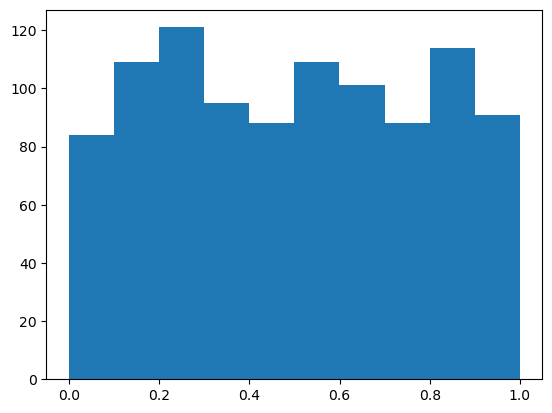

In [6]:
# We may plot the results of these random number generators

from matplotlib import pyplot as plt

Rs = [rnd.random() for i in range(1000)]
plt.hist(Rs)

(array([102.,  90., 112.,  90.,  99., 113., 100.,  84., 109., 101.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

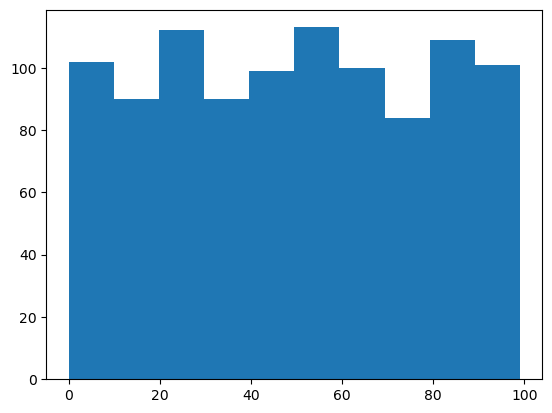

In [7]:
Rs = [rnd.randrange(100) for i in range(1000)]
plt.hist(Rs)

(array([  2.,   4.,  47., 113., 209., 252., 207., 111.,  43.,  12.]),
 array([-3.59237222, -2.932809  , -2.27324579, -1.61368257, -0.95411935,
        -0.29455614,  0.36500708,  1.0245703 ,  1.68413351,  2.34369673,
         3.00325994]),
 <BarContainer object of 10 artists>)

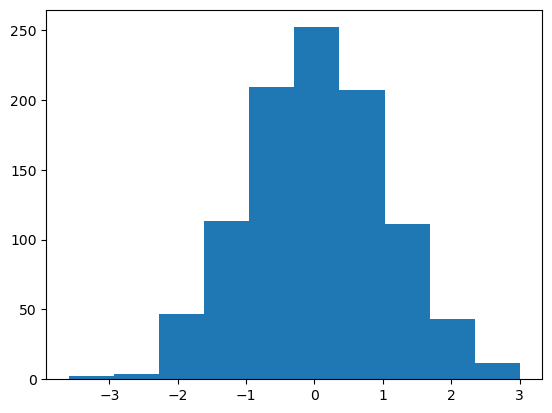

In [8]:
Rs = [rnd.gauss(0, 1) for i in range(1000)]
plt.hist(Rs)

[[-0.16114969816543806, -1.4692171895741344, 0.41732546582715274, -0.6020797742536269, 1.334985402237854, 0.943089962243328, 0.5393117122875506, -0.3684188209897918, 1.4852874690096016, -1.0857238523846968, -0.34889952337739355, -0.9581927867981102, 0.622077354607933, 1.9307349205345294, -1.5867479423305786, -1.2059033807195756, 1.4535078258486223, 0.8462509298315813, -1.2755716540649424, 0.07833713135569635, -0.539908501841771, -0.8391085157062881, 1.3009699675257502, -0.0012295364706540783, -0.583839324447058, -0.4743667987970708, 0.9390514482110182, 1.2732611455518, 1.1946728431536797, 0.7081438890541405, 1.9631034054323306, -0.3142956394582854, 0.11911799832554289, 0.6054732084693262, -0.7457156310536365, -0.5744460220027093, -0.5238882226345388, 1.4882521058050113, -0.06695260691179611, 1.121457655829088, 0.3964806398837293, -2.1862047555304147, -0.0761601189895549, 0.06246282773477425, 0.7661386448435121, 0.9187039214586817, -0.35965658616925267, -0.2962680041957436, 0.8094238518

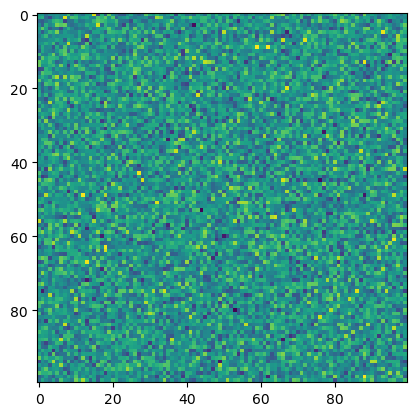

In [21]:
# We may even show the random numbers in image
a = [[rnd.gauss(0,1) for i in range(100)] for j in range(100)]
print(a)
plt.imshow([[rnd.gauss(0,1) for i in range(100)] for j in range(100)])

In [25]:
# There is also a seed() function

rnd.seed(1234)
print([rnd.randrange(100) for i in range(10)])

rnd.seed(1234)
print([rnd.randrange(100) for i in range(10)])

# change the seed number and run again, do you see the difference?

[99, 56, 14, 0, 11, 74, 4, 85, 88, 10]
[99, 56, 14, 0, 11, 74, 4, 85, 88, 10]


* Once we have a random number generator, we are ready to develop Monte Carlo methods!

* We will start with a simple example of random walk.  The model is very simple:
  * We start with a (drunk) person at the center of the street.
  * As time t to t+1, the person randomly move one way +1 or the other -1 along the street.
  * The problem is, after n steps, how far away is the person away from the center of the street?

[0, -1, -2, -1, -2, -1, 0, -1, -2, -3, -2, -1, -2, -3, -4, -5, -4, -5, -4, -5, -4, -5, -6, -5, -6, -7, -8, -9, -10, -9, -8, -9, -10, -11, -12, -13, -12, -11, -10, -11, -12, -13, -12, -13, -14, -13, -14, -15, -16, -15, -16, -17, -16, -15, -16, -17, -18, -19, -18, -17, -16, -17, -16, -17, -16, -17, -16, -17, -18, -17, -16, -15, -14, -15, -14, -15, -14, -15, -14, -13, -12, -13, -14, -13, -14, -15, -14, -15, -14, -15, -16, -17, -16, -17, -18, -17, -16, -17, -18, -17, -16, -15, -16, -15, -16, -17, -16, -15, -16, -15, -14, -13, -12, -13, -14, -13, -14, -15, -14, -13, -12, -13, -14, -15, -14, -15, -14, -15, -14, -15, -16, -17, -18, -17, -16, -15, -14, -13, -14, -13, -14, -13, -12, -13, -12, -13, -12, -13, -14, -13, -14, -13, -12, -11, -12, -11, -10, -11, -12, -13, -14, -15, -16, -17, -16, -17, -16, -17, -18, -19, -20, -19, -18, -19, -18, -19, -18, -19, -20, -19, -20, -21, -22, -23, -22, -21, -22, -23, -24, -23, -24, -23, -22, -23, -24, -25, -24, -25, -26, -27, -28, -27, -28, -27, -28, -27, -2

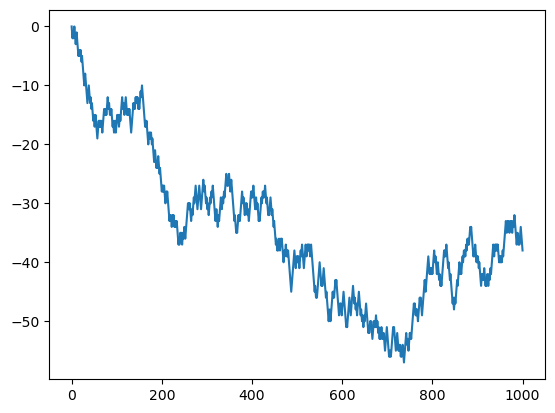

In [35]:
# let's set up this problem in the following way:

T = range(1, 1000+1) # time step
X = [0] # initial position

for t in T:
    last = X[-1]            # last position of list X
    r    = rnd.randint(0,1) # we generate 0 or 1 randomly, see above for randint
    if r == 0:              # depending on r, we step +1 or -1
        curr = last + 1
    else:
        curr = last - 1
    X.append(curr)          # append the current position to the list X

# let's plot this random walk
# print(len(X))
plt.plot(X)
print(X)
# can we convert these codes into a function? what would be the input and the output?

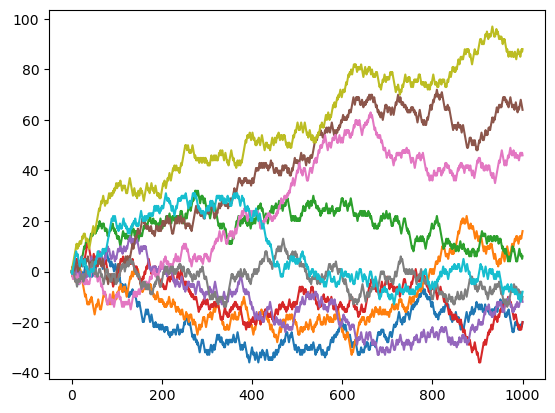

In [12]:
# In order to find out how random walk behave statistically,
# we want to be able to run many simulations!

# It is convenient to define a function

def randomwalk(n_steps=1000):
    X = [0] # initial position
    
    for t in range(n_steps):
        last = X[-1]            # last position
        r    = rnd.randint(0,1) # we generate 0 or 1 randomly
        if r == 0:              # depending on r, we step left or right
            curr = last + 1
        else:
            curr = last - 1    
        X.append(curr)          # append the current position to the list X
        
    return X                    # return the result

# And we can use this function in another loop.
for i in range(10):
    plt.plot(randomwalk())

[0, -1]
[0, 1, 0]
[0, 1, 0, -1]
[0, -1, -2, -1, -2]
[0, -1, -2, -1, 0, 1]
[0, -1, 0, -1, 0, 1, 2]
[0, -1, -2, -1, -2, -3, -2, -1]
[0, 1, 0, 1, 2, 3, 4, 3, 2]
[0, -1, 0, 1, 0, 1, 2, 3, 2, 3]
[0, 1, 0, -1, -2, -3, -4, -3, -2, -3, -4]
[0, -1, 0, -1, 0, 1, 2, 1, 2, 1, 0, -1]
[0, 1, 0, -1, -2, -3, -2, -1, 0, 1, 2, 3, 2]
[0, 1, 0, -1, -2, -1, -2, -3, -4, -3, -4, -3, -2, -1]
[0, -1, 0, -1, 0, -1, -2, -3, -4, -3, -2, -3, -2, -1, 0]
[0, -1, 0, 1, 2, 3, 2, 3, 4, 3, 4, 3, 2, 1, 2, 3]
[0, 1, 0, 1, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 2]
[0, -1, -2, -3, -4, -3, -4, -5, -4, -5, -6, -5, -6, -5, -6, -7, -8, -9]
[0, -1, -2, -1, 0, 1, 0, -1, 0, 1, 0, -1, -2, -1, 0, -1, -2, -1, 0]
[0, -1, -2, -3, -4, -3, -4, -3, -4, -3, -2, -1, 0, -1, 0, 1, 0, 1, 2, 3]
[0, -1, 0, -1, -2, -3, -4, -3, -4, -3, -2, -1, 0, 1, 2, 1, 2, 3, 4, 3, 2]
[0, 1, 2, 1, 0, -1, 0, -1, 0, 1, 2, 1, 0, 1, 2, 1, 0, -1, 0, 1, 0, -1]
[0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 4, 3, 2, 3, 2, 1, 2, 3, 2, 1, 0, -1, 0]
[0, -1, 0, 1, 2, 1, 2, 1, 0, 1, 0, -1, 0,

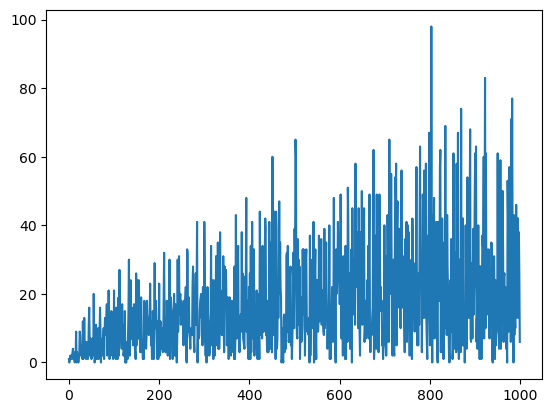

In [34]:
# We may now ask how far away the peron would walk depending on the number of steps.

D = []
for t in T:
    X = randomwalk(t)
    D.append(abs(X[-1]))
    print(X)
plt.plot(D)

# Clearly, the distance gets farther when the number of steps increase.
# But this figure is too noisy to show the dependency.

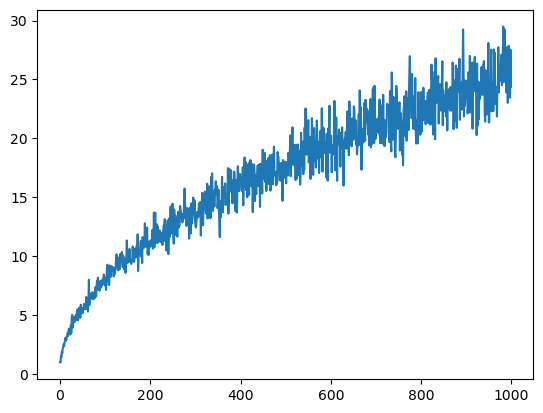

In [14]:
# There are multiple ways to make the above figure less noise.
# One way is to simply do multiple numerical experiments for the same number of steps.
# And obtain the average distance.

n_trials = 100
D = []
for t in T:
    M = 0
    for trial in range(n_trials):
        X  = randomwalk(t)
        M += abs(X[-1])
    M /= n_trials
    D.append(M)
    
plt.plot(D)

# The plot is much better!

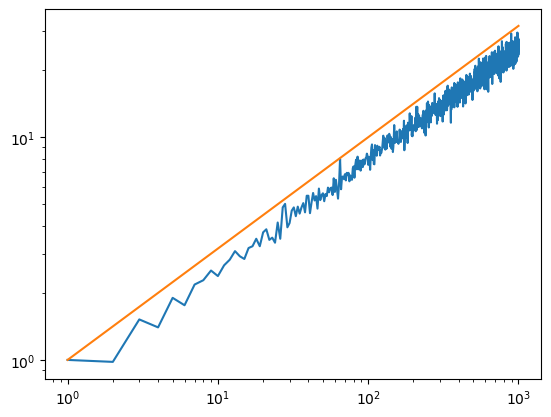

In [15]:
# let's plot this in log-log scale.
# And compare it with the law of diffusion D ~ sqrt(T)

plt.loglog(T, D)
plt.plot(T, [t**0.5 for t in T])

* You may use this simple random walk model to model real physical process.

* For example, the Brownian motion, which describe how pollen is randomly pushed by water molecules.

![Brownian motion](https://upload.wikimedia.org/wikipedia/commons/c/c2/Brownian_motion_large.gif)

* Einstein published a paper on Brownian motion in 1905, which is one of his first major scientific contributions.
* Einstein argued that the displacement of a Brownian particle is not proportional to the elapsed time, but rather to its square root.

![Einstein paper](https://books.google.com/books/content?id=6E90uQAACAAJ&printsec=frontcover&img=1&zoom=1&imgtk=AFLRE73LNhOSPC3TgN-nQbwWZcT9e6HMW3OBrA2xXzu0xA3a-yB5eLs6UFMVMObtICAS4stFGkBRnNIUShEtCNjR2WspNO0vs46rB07TYcmRBZn1WF0SGWziM5n39N757D7XX5-udBYg)

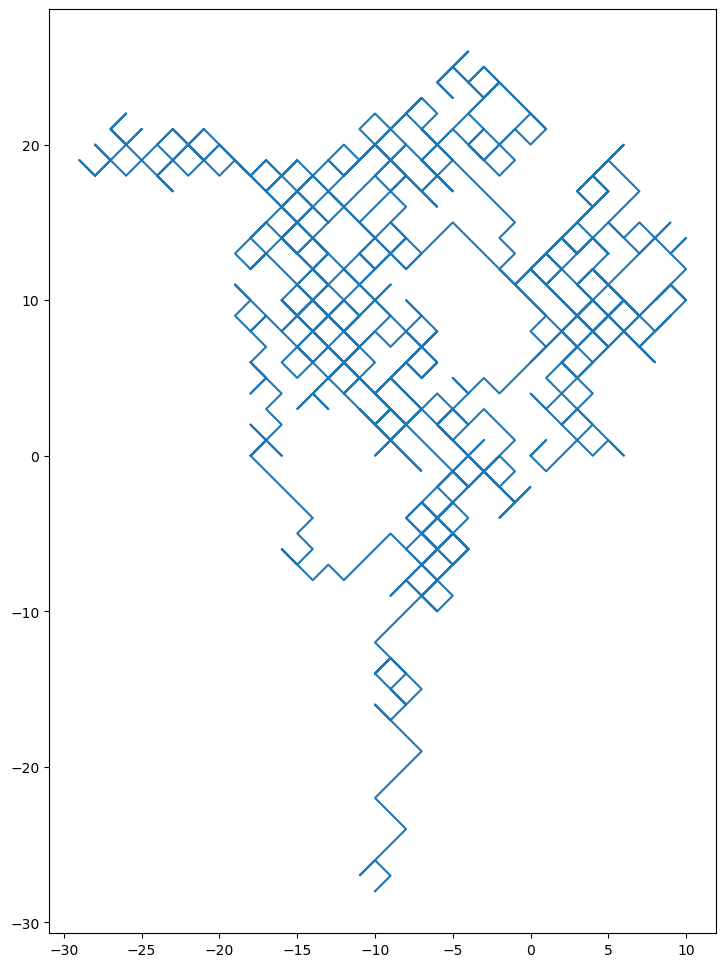

In [16]:
# The simplest model of Brownian motion is a two-dimension random walk.

X = randomwalk()
Y = randomwalk()

plt.figure(figsize=(12,12))
plt.plot(X, Y)
plt.gca().set_aspect('equal')

# The resulting plot looks slightly funny because random walk forces x and y both to move at exactly one step.
# The final outcome is that the particle can only move in diagonal directions.

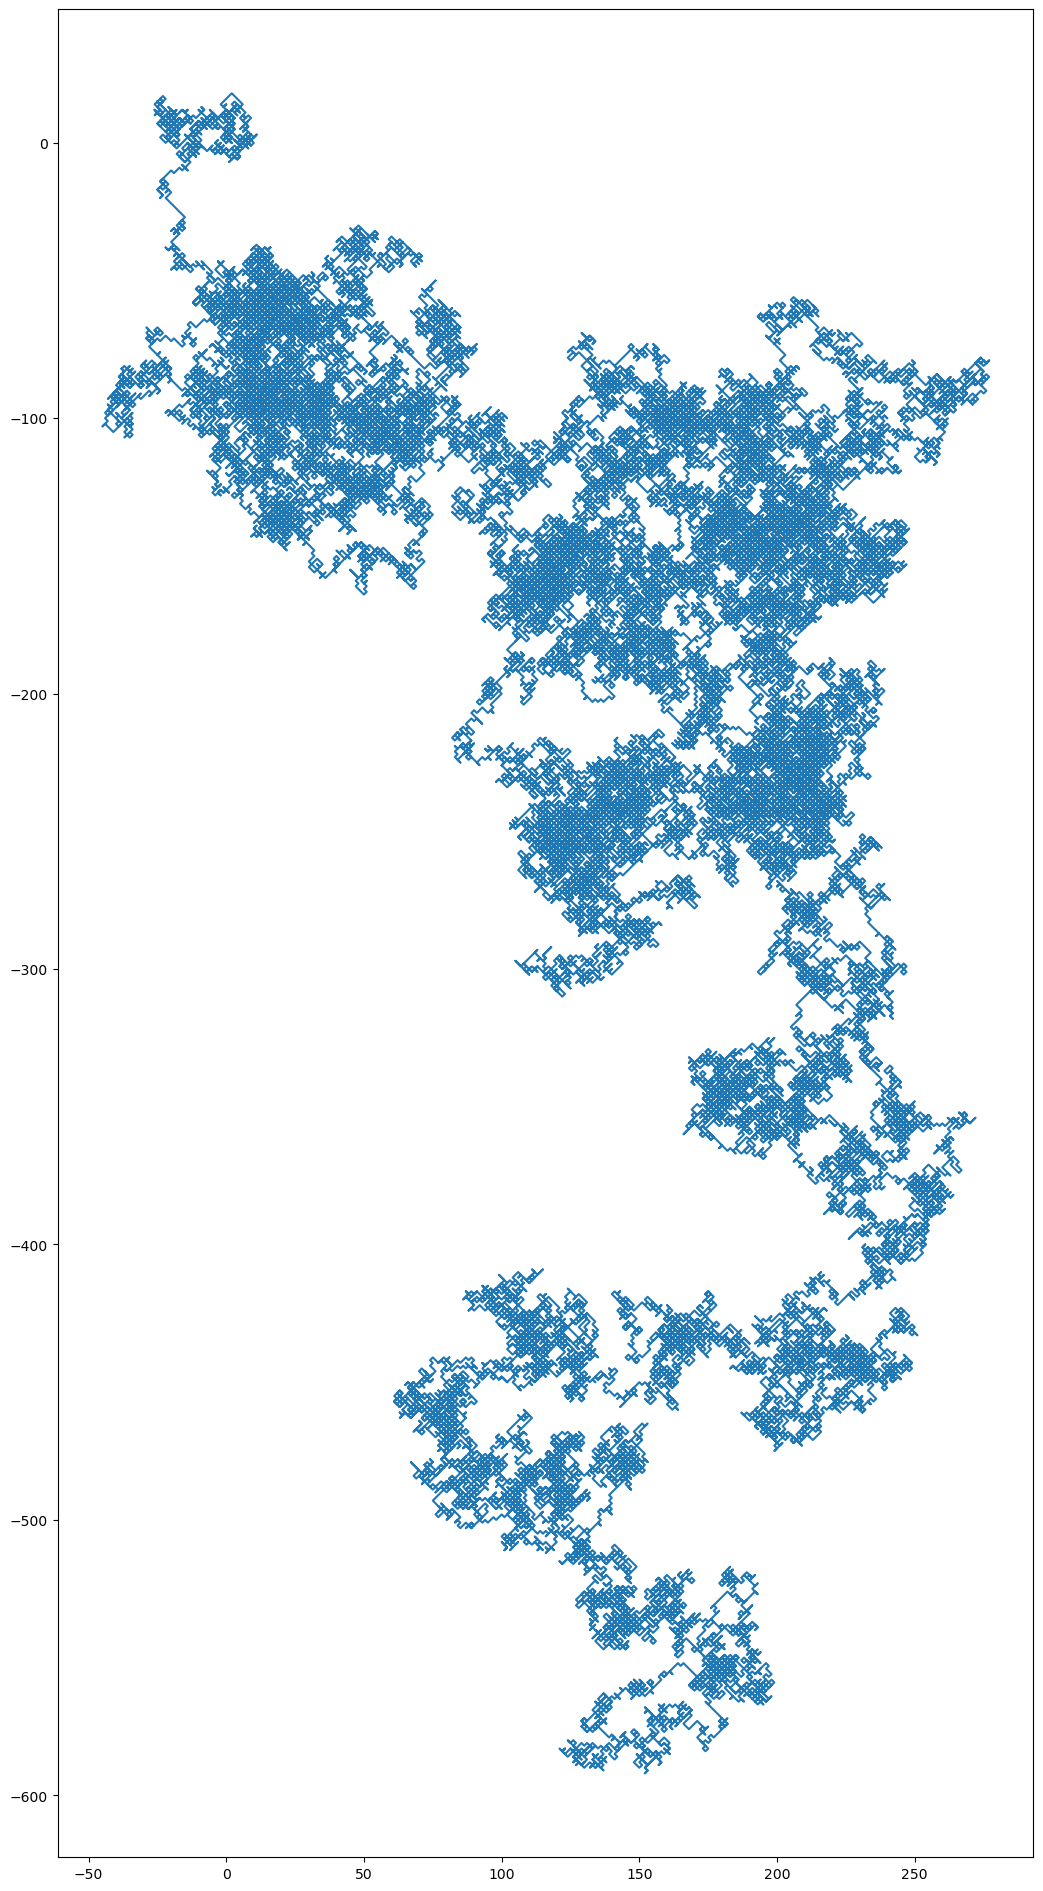

In [36]:
# But this artifact becomes irrelevant when we model random walk for many many more steps.

X = randomwalk(100000)
Y = randomwalk(100000)

plt.figure(figsize=(24,24))
plt.plot(X, Y)
plt.gca().set_aspect('equal')